In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

![Titanic Route](https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png)

## EDA

In [3]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.sample(10)

PassengerId  Survived  Pclass                               Name     Sex  \
221          222         0       2               Bracken, Mr. James H    male   
639          640         0       3         Thorneycroft, Mr. Percival    male   
202          203         0       3         Johanson, Mr. Jakob Alfred    male   
168          169         0       1                Baumann, Mr. John D    male   
836          837         0       3                   Pasic, Mr. Jakob    male   
475          476         0       1        Clifford, Mr. George Quincy    male   
127          128         1       3          Madsen, Mr. Fridtjof Arne    male   
342          343         0       2         Collander, Mr. Erik Gustaf    male   
103          104         0       3         Johansson, Mr. Gustaf Joel    male   
689          690         1       1  Madill, Miss. Georgette Alexandra  female   

      Age  SibSp  Parch    Ticket      Fare Cabin Embarked  
221  27.0      0      0    220367   13.0000   NaN        S  
639   NaN      1      0    376564   16.1000   NaN        S  
202  34.0      0      0   3101264    6.4958   NaN        S  
168   NaN      0      0  PC 17318   25.9250   NaN        S  
836  21.0      0      0    315097    8.6625   NaN        S  
475   NaN      0      0    110465   52.0000   A14        S  
127  24.0      0      0   C 17369    7.1417   NaN        S  
342  28.0      0      0    248740   13.0000   NaN        S  
103  33.0      0      0      7540    8.6542   NaN        S  
689  15.0      0      1     24160  211.3375    B5        S

<Axes: xlabel='Pclass', ylabel='count'>

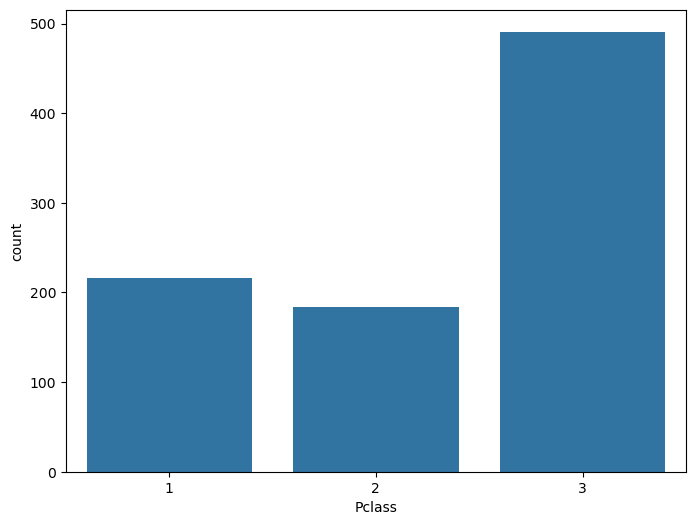

In [4]:
sns.countplot(x='Pclass', data=titanic)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
titanic.loc[:, ('Cabin', 'Pclass')].groupby('Pclass').count()

Cabin
Pclass       
1         176
2          16
3          12

<Axes: xlabel='Survived', ylabel='count'>

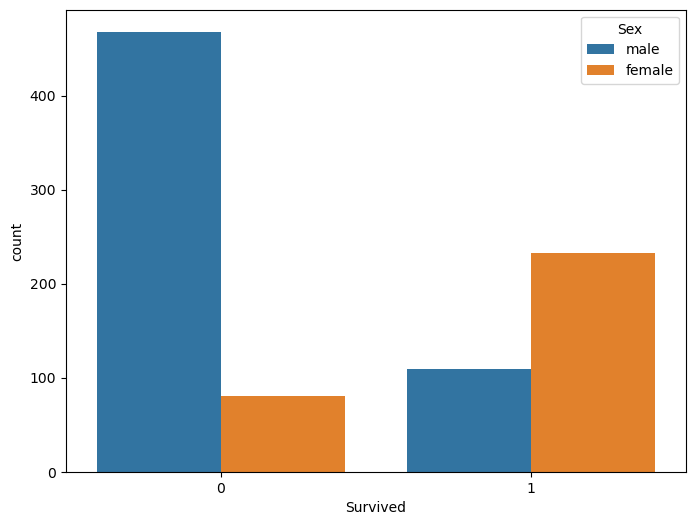

In [8]:
sns.countplot(data=titanic, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

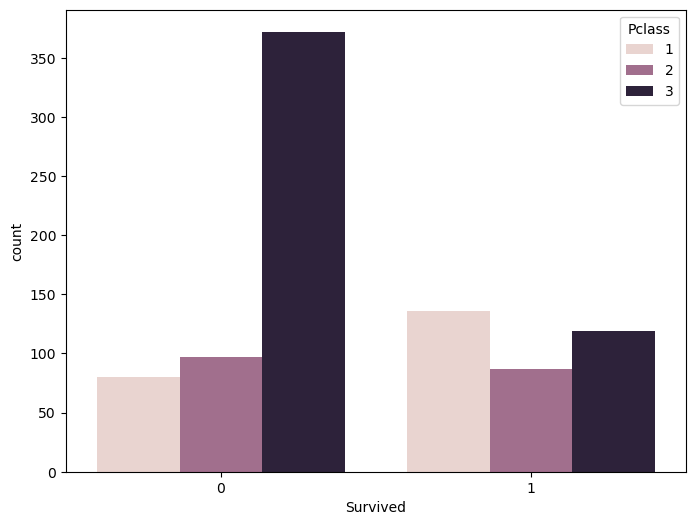

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

<Axes: xlabel='Age', ylabel='Density'>

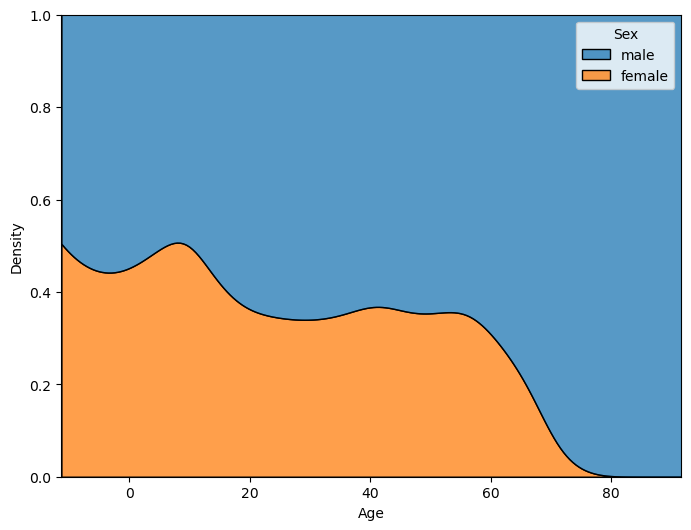

In [10]:
sns.kdeplot(x='Age', data=titanic, hue="Sex", multiple='fill')

<Axes: xlabel='Pclass', ylabel='Age'>

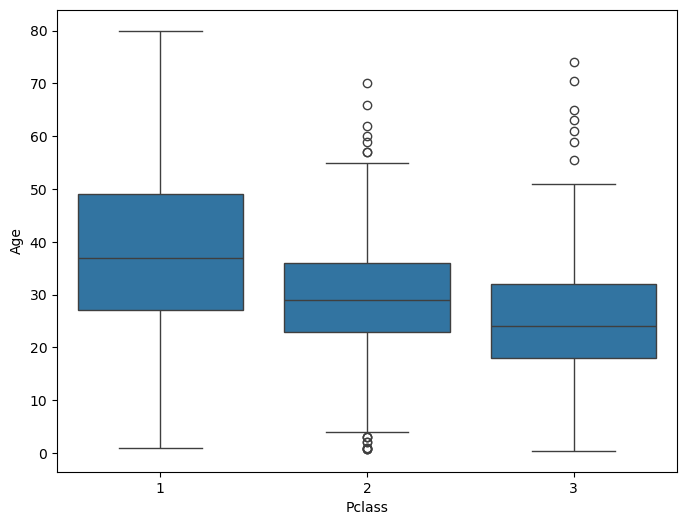

In [11]:
sns.boxplot(y='Age', x='Pclass', data=titanic)

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [13]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titanic = titanic.drop(titanic[titanic.Embarked.isnull()].index)

In [14]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
titanic['Age'] = titanic.Age.fillna(titanic.groupby('Pclass')['Age'].transform('mean'))

In [16]:
titanic.isnull().sum().sum()

0

In [17]:
titanic.sample(5)

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
595         0       3    male  36.0      1      1   24.1500        S
624         0       3    male  21.0      0      0   16.1000        S
345         1       2  female  24.0      0      0   13.0000        S
869         1       3    male   4.0      1      1   11.1333        S
297         0       1  female   2.0      1      2  151.5500        S

In [18]:
titanic = pd.get_dummies(data=titanic, columns=['Sex', 'Embarked'], drop_first=True)

In [19]:
titanic.sample(5)

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
240         0       3  25.140620      1      0  14.4542     False       False   
740         1       1  38.105543      0      0  30.0000      True       False   
454         0       3  25.140620      0      0   8.0500      True       False   
573         1       3  25.140620      0      0   7.7500     False        True   
449         1       1  52.000000      0      0  30.5000      True       False   

     Embarked_S  
240       False  
740        True  
454        True  
573       False  
449        True

##
## Training

In [20]:
X = titanic.drop(columns='Survived')
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
def plot_strata(train, test, title):
    train_pct = train.value_counts()
    test_pct = test.value_counts()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title, fontsize=16)
    ax1.set_title('train')
    ax2.set_title('test')
    ax1.pie(train_pct, autopct='%1.1f%%', labels=train_pct.index)
    ax2.pie(test_pct, autopct='%1.1f%%', labels=test_pct.index)

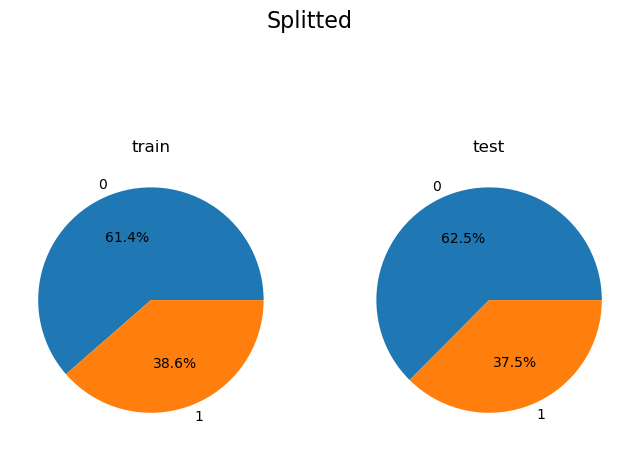

In [22]:
plot_strata(y_train, y_test, 'Splitted')

## Strata

* *Stratum*/*Strata* = Teilmenge mit bestimmtem Merkmal(z.B. `age < 18`)
* Verteilungen von interessanten Features müssen in Train- und Testset nicht gleich sein
* Kann mit `stratify=<feature>` erzwungen werden
* Üblicherweise empfehlenswert

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

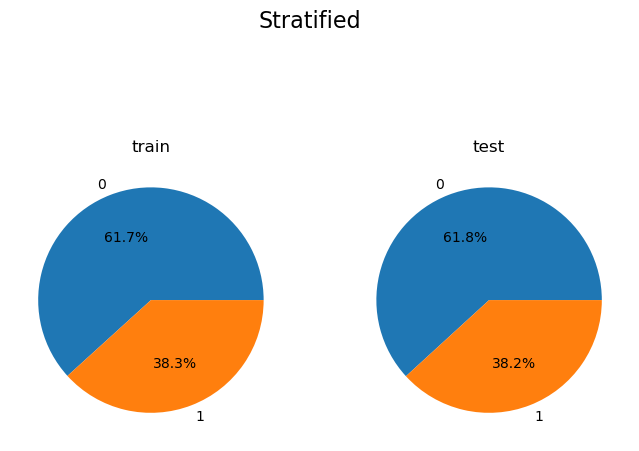

In [24]:
plot_strata(y_train, y_test, 'Stratified')

### Logistic Regression aka Sigmoid

![graph](./assets/logistic-regression.png)

* Gibt Wahrscheinlichkeiten aus

In [25]:
log_reg = LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8052434456928839

In [26]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7940074906367042

In [29]:
sample = pd.DataFrame(data=[
    [1, 39, 0, 0, 90, 1, 1, 0],
    [1, 18, 0, 0, 40, 1, 0, 1],
    [2, 17, 1, 0, 30, 0, 0, 0],
], columns=X_train.columns)
sample

Pclass  Age  SibSp  Parch  Fare  Sex_male  Embarked_Q  Embarked_S
0       1   39      0      0    90         1           1           0
1       1   18      0      0    40         1           0           1
2       2   17      1      0    30         0           0           0

In [30]:
print('log_reg', log_reg.predict_proba(sample))
print('forest ', forest.predict_proba(sample))

log_reg [[0.40220839 0.59779161]
 [0.36152407 0.63847593]
 [0.13920633 0.86079367]]
forest  [[0.73 0.27]
 [0.69 0.31]
 [0.13 0.87]]
